## Facebook statistics (user count, income, costs) prediction

# Data preparation

In [56]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [57]:
user_count_q = {
    'Q':
    ['Q3 08', 'Q1 09', 'Q2 09', 'Q3 09', 'Q4 09','Q1 10',
     'Q2 10', 'Q3 10', 'Q4 10', 'Q1 11', 'Q2 11','Q3 11', 
     'Q4 11', 'Q1 12', 'Q2 12', 'Q3 12', 'Q4 12','Q1 13',
     'Q2 13', 'Q3 13', 'Q4 13','Q1 14', 'Q2 14', 'Q3 14',
     'Q4 14','Q1 15', 'Q2 15', 'Q3 15', 'Q4 15','Q1 16', 
     'Q2 16', 'Q3 16', 'Q4 16','Q1 17', 'Q2 17', 'Q3 17', 'Q4 17'],
    'User count': 
    [100, 197, 242, 305, 360, 431, 482,  550, 608, 680, 739, 800,
     845, 901, 955, 1007, 1056, 1110, 1155, 1189, 1228, 1276, 1317,
     1350, 1393, 1441, 1490, 1545, 1591, 1654, 1712, 1788, 1860, 1936,
     2006, 2072, 2129] 
}
user_count_q_test = {
    'Q':
    ['Q1 18', 'Q2 18', 'Q3 18', 'Q4 18',
    'Q1 19', 'Q2 19', 'Q3 19', 'Q4 19',
    'Q1 20', 'Q2 20', 'Q3 20', 'Q4 20',
    'Q1 21', 'Q2 21', 'Q3 21', 'Q4 21',
    'Q1 22', 'Q2 22', 'Q3 22', 'Q4 22'],
    'User count': 
    [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797,
    2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963]
}

In [58]:
user_count_q_df = pd.DataFrame(user_count_q)
user_count_q_test_df = pd.DataFrame(user_count_q_test)

In [59]:
def convert_quarter_to_year(quarter):
    year_str = quarter.split(' ')[1]
    year_int = 2000 + int(year_str)
    return year_int

In [60]:
user_count_y_df = user_count_q_df.copy()
user_count_y_df['Q'] = user_count_y_df['Q'].map(convert_quarter_to_year)
user_count_y_df = user_count_y_df.groupby('Q', as_index=False).max()
user_count_y_df.rename(columns={'Q': 'Y'}, inplace=True)

In [61]:
fb_stats_y = {
    'Y': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Income': [153, 272, 777, 1974, 3711, 5089, 7872, 12466, 17928, 27638, 40653],
    'Profit': [-138, -56, 229, 606, 1000, 53, 1500, 2940, 3688, 10217, 15934],
    'Employment': [450, 850, 1218, 2127, 3200, 4619, 6337, 9199, 12691, 17048, 25105]
}

fb_stats_y_test = {
    'Y': [2018, 2019, 2020, 2021, 2022],
    'Income': [55838, 70697, 85965, 117929, 116609],
    'Profit': [22112, 18485, 29146, 39370, 23200],
    'Costs': [33726, 52212, 56819, 78559, 93409],
    'Employment': [35587, 44942, 58604, 71970, 87314],
    'User count': [2320, 2498, 2797, 2912, 2963]
}

In [62]:
fb_stats_y_df = pd.DataFrame(fb_stats_y)
fb_stats_y_test_df = pd.DataFrame(fb_stats_y_test)

In [63]:
fb_stats_y_df['Costs'] = fb_stats_y_df['Income'] - fb_stats_y_df['Profit']

In [64]:
fb_stats_y_df.drop([0], inplace=True)
fb_stats_y_df.reset_index(drop=True, inplace=True)
fb_stats_y_df.insert(3, 'User count', user_count_y_df['User count'])

In [65]:
def calculate_model_stats(y_hat, y_true, X):
    X = np.insert(X, 0, 1, axis=1)
    residuals = y_true - y_hat
    residual_sum_of_squares = residuals.T @ residuals
    standard_variance = residual_sum_of_squares[0, 0] / (y_hat.shape[0] - X.shape[1])
    model_coefs_variances = standard_variance * np.linalg.inv(X.T @ X) 
    stats = dict()
    
    for number in range(model_coefs_variances.shape[0]):
        stats['Standard error a' + str(number)] = np.sqrt(model_coefs_variances[number, number])
    stats['Standard error y'] = np.sqrt(standard_variance)
    
    return stats

array([[<Axes: xlabel='Y', ylabel='Y'>,
        <Axes: xlabel='Income', ylabel='Y'>,
        <Axes: xlabel='Profit', ylabel='Y'>,
        <Axes: xlabel='User count', ylabel='Y'>,
        <Axes: xlabel='Employment', ylabel='Y'>,
        <Axes: xlabel='Costs', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Profit', ylabel='Income'>,
        <Axes: xlabel='User count', ylabel='Income'>,
        <Axes: xlabel='Employment', ylabel='Income'>,
        <Axes: xlabel='Costs', ylabel='Income'>],
       [<Axes: xlabel='Y', ylabel='Profit'>,
        <Axes: xlabel='Income', ylabel='Profit'>,
        <Axes: xlabel='Profit', ylabel='Profit'>,
        <Axes: xlabel='User count', ylabel='Profit'>,
        <Axes: xlabel='Employment', ylabel='Profit'>,
        <Axes: xlabel='Costs', ylabel='Profit'>],
       [<Axes: xlabel='Y', ylabel='User count'>,
        <Axes: xlabel='Income', ylabel='User count'>,
        <Axes: xla

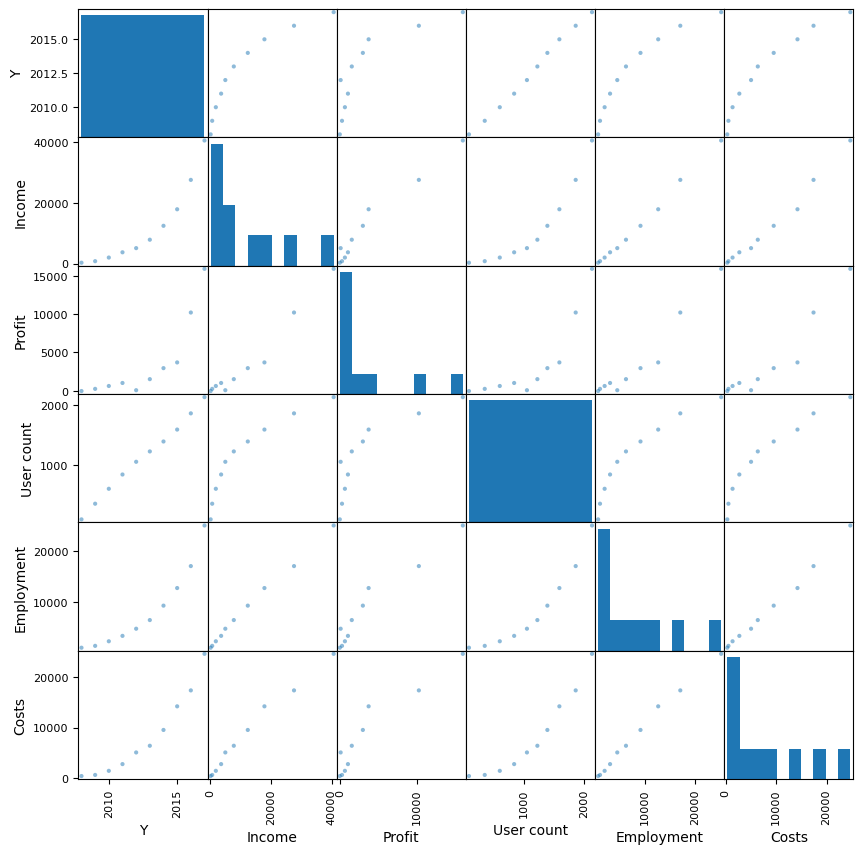

In [66]:
pd.plotting.scatter_matrix(fb_stats_y_df, figsize=(10, 10))

## User count prediction model

In [67]:
def transform_quarter_to_number(string):
    quarter, year = string.split(' ')
    quarters = {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}
    year = int(year) - 8
    return year * 4 + quarters[quarter]

def transform_number_to_quarter(number):
    quarters = {0:'Q1', 1:'Q2', 2:'Q3', 3:'Q4'}
    year = (number // 4) + 8
    quarter = quarters[number % 4]
    quarter_string = quarter + ' {:02d}'.format(year)
    return  quarter_string

In [68]:
user_count_q_df['Q'] = user_count_q_df['Q'].map(transform_quarter_to_number)
user_count_q_test_df['Q'] = user_count_q_test_df['Q'].map(transform_quarter_to_number)

In [69]:
R_train = user_count_q_df['Q'].to_numpy().reshape(-1, 1)
U_train = user_count_q_df['User count'].to_numpy().reshape(-1, 1)
R_test = user_count_q_test_df['Q'].to_numpy().reshape(-1, 1)
U_test = user_count_q_test_df['User count'].to_numpy().reshape(-1, 1)

lin_reg_user_count = LinearRegression()
lin_reg_user_count.fit(R_train, U_train)

print(f'User count R^2: {lin_reg_user_count.score(R_test, U_test)}')

User count R^2: 0.9228353300271839


In [70]:
a1 = lin_reg_user_count.coef_[0]
a0 = lin_reg_user_count.intercept_

U_train_pred = a1 * R_train + a0
U_test_pred = a1 * R_test + a0

R_train_quarters = np.array([transform_number_to_quarter(number) for number in R_train.reshape(-1)])
R_test_quarters = np.array([transform_number_to_quarter(number) for number in R_test.reshape(-1)])

R_ticks = np.hstack([R_train.reshape(-1), R_test.reshape(-1)])
R_ticks_quarters = np.hstack([R_train_quarters.reshape(-1), R_test_quarters.reshape(-1)])
print(a0, a1)

[17.64452405] [52.63808326]


In [71]:
errors = calculate_model_stats(lin_reg_user_count.predict(R_train), U_train, R_train)
print(errors)
U_error = errors['Standard error y']

{'Standard error a0': 13.43654082331701, 'Standard error a1': 0.5704188428748668, 'Standard error y': 37.20850888700467}


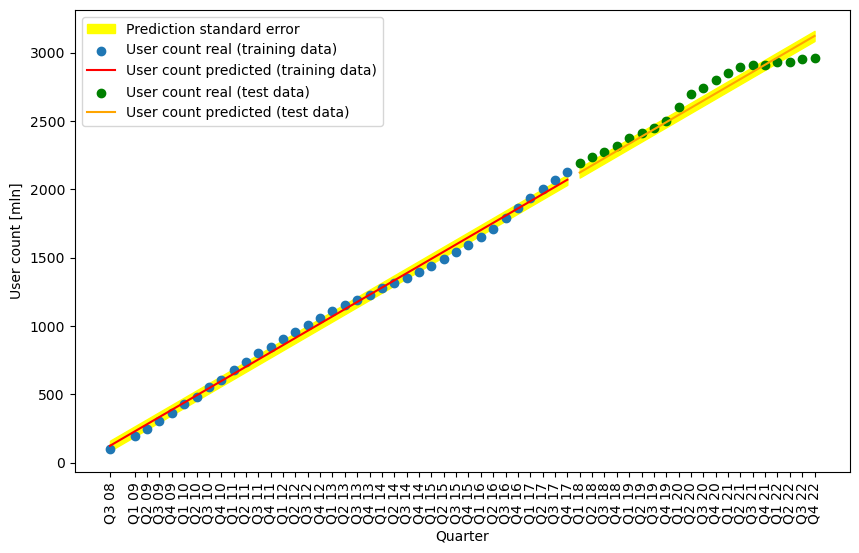

In [72]:
plt.figure(figsize=(10,6))
plt.fill_between(R_train.reshape(-1), (U_train_pred - U_error).reshape(-1), (U_train_pred + U_error).reshape(-1), color='yellow', label='Prediction standard error')
plt.fill_between(R_test.reshape(-1), (U_test_pred - U_error).reshape(-1), (U_test_pred + U_error).reshape(-1), color='yellow')
plt.scatter(R_train, U_train, label="User count real (training data)")
plt.plot(R_train, U_train_pred, label='User count predicted (training data)', color='red')
plt.scatter(R_test, U_test, label="User count real (test data)", color='green')
plt.plot(R_test, U_test_pred, label='User count predicted (test data)', color='orange')
plt.xticks(R_ticks, R_ticks_quarters,rotation='vertical')
plt.ylabel('User count [mln]')
plt.xlabel('Quarter')
plt.legend()

## Income prediction model

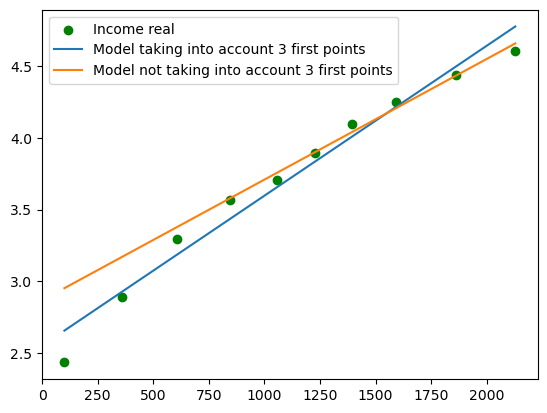

In [73]:
U_train_1 = fb_stats_y_df['User count'].to_numpy().reshape(-1, 1)
P_train_1 = fb_stats_y_df['Income'].to_numpy().reshape(-1, 1)
P_train_log_1 = np.log10(P_train_1)

U_train_2 = fb_stats_y_df['User count'].to_numpy()[3:].reshape(-1, 1)
P_train_2 = fb_stats_y_df['Income'].to_numpy()[3:].reshape(-1, 1)
P_train_log_2 = np.log10(P_train_2)

l1 = LinearRegression()
l1.fit(U_train_1, P_train_log_1)
l2 = LinearRegression()
l2.fit(U_train_2, P_train_log_2)

a11 = l1.coef_[0]
a01 = l1.intercept_

a12 = l2.coef_[0]
a02 = l2.intercept_


P_pred_1 = a11 * U_train_1 + a01
P_pred_2 = a12 * U_train_1 + a02

plt.scatter(U_train_1, P_train_log_1,color='green', label='Income real')
plt.plot(U_train_1, P_pred_1, label='Model taking into account 3 first points')
plt.plot(U_train_1, P_pred_2, label='Model not taking into account 3 first points')
plt.legend()

In [74]:
U_train = fb_stats_y_df['User count'].to_numpy()[3:].reshape(-1, 1)
P_train = fb_stats_y_df['Income'].to_numpy()[3:].reshape(-1, 1)
P_train_log = np.log10(P_train)

U_test = fb_stats_y_test_df['User count'].to_numpy().reshape(-1, 1)
P_test = fb_stats_y_test_df['Income'].to_numpy().reshape(-1, 1)
P_test_log = np.log10(P_test)

In [75]:
lin_reg_income = LinearRegression()
lin_reg_income.fit(U_train, P_train_log)

print(f'Income R^2: {lin_reg_income.score(U_test, P_test_log)}')

Income R^2: -2.138586215415125


In [76]:
errors = calculate_model_stats(lin_reg_income.predict(U_train), P_train_log, U_train)
print(errors)
P_error = errors['Standard error y']

{'Standard error a0': 0.062252720620275884, 'Standard error a1': 4.143463098712143e-05, 'Standard error y': 0.04581266696587815}


In [77]:
a1 = lin_reg_income.coef_[0]
a0 = lin_reg_income.intercept_

print(a0, a1)

P_train_pred = a1 * U_train + a0
P_test_pred = a1 * U_test + a0

[2.86826694] [0.00084084]


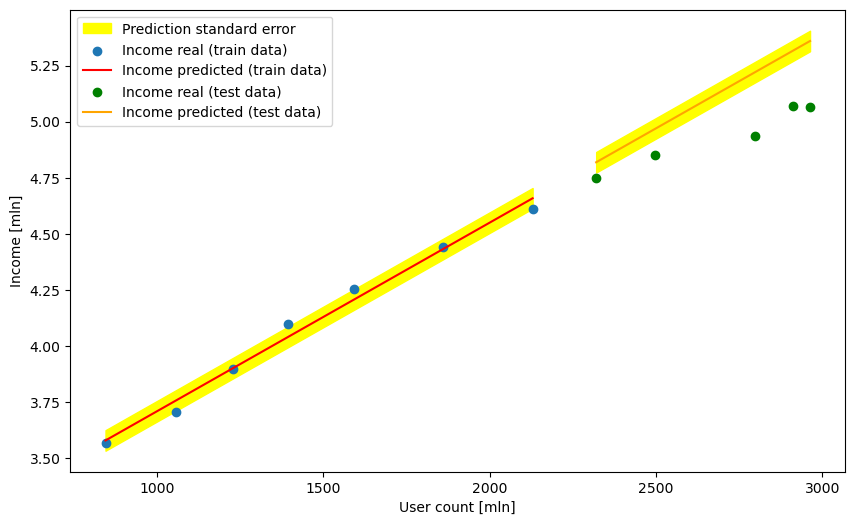

In [78]:
plt.figure(figsize=(10,6))
plt.fill_between(U_train.reshape(-1), (P_train_pred - P_error).reshape(-1), (P_train_pred + P_error).reshape(-1), color='yellow', label='Prediction standard error')
plt.fill_between(U_test.reshape(-1), (P_test_pred - P_error).reshape(-1), (P_test_pred + P_error).reshape(-1), color='yellow')
plt.scatter(U_train, P_train_log, label="Income real (train data)")
plt.plot(U_train, P_train_pred, label='Income predicted (train data)', color='red')
plt.scatter(U_test, P_test_log, label="Income real (test data)", color='green')
plt.plot(U_test, P_test_pred, label='Income predicted (test data)', color='orange')
plt.ylabel('Income [mln]')
plt.xlabel('User count [mln]')
plt.legend()

## Cost prediction model

In [79]:
Z_train = fb_stats_y_df['Employment'].to_numpy().reshape(-1, 1)
U_train = fb_stats_y_df['User count'].to_numpy().reshape(-1, 1)
ZU_train = np.column_stack([Z_train, U_train])
K_train = fb_stats_y_df['Costs'].to_numpy().reshape(-1, 1)

Z_test = fb_stats_y_test_df['Employment'].to_numpy().reshape(-1, 1)
U_test = fb_stats_y_test_df['User count'].to_numpy().reshape(-1, 1)
ZU_test = np.column_stack([Z_test, U_test])
K_test = fb_stats_y_test_df['Costs'].to_numpy().reshape(-1, 1)

In [80]:
lin_reg_costs = LinearRegression()
lin_reg_costs.fit(ZU_train, K_train)

print(f'Costs R^2: {lin_reg_costs.score(ZU_test, K_test)}')

Costs R^2: 0.8720074779962189


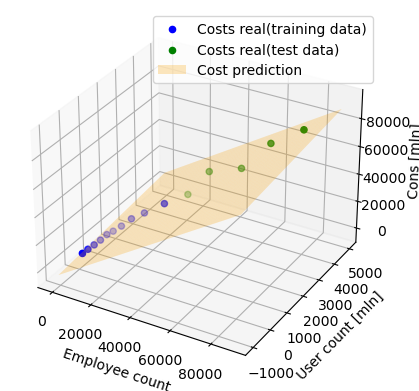

In [81]:
axis_x = np.linspace(-1000, 90000, 100)
axis_y = np.linspace(-1000, 5000, 100)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)
z = lin_reg_costs.coef_[0][0] * axis_x + lin_reg_costs.coef_[0][1] * axis_y + lin_reg_costs.intercept_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_train, U_train, K_train, label='Costs real(training data)', color='blue')
ax.scatter(Z_test, U_test, K_test, label='Costs real(test data)', color='green')
surf = ax.plot_surface(axis_x, axis_y, z, alpha=0.25, label='Cost prediction', color='orange')
surf._edgecolors2d = surf._edgecolor3d
surf._facecolors2d = surf._facecolor3d

ax.legend()
ax.set_xlabel('Employee count')
ax.set_ylabel('User count [mln]')
ax.set_zlabel('Cons [mln]')
plt.show()